In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_feather('site_175_report.feather')
# df = df.loc[df['timestamp'].dt.to_period('M')  == '2021-10']
df = df.loc[(df['timestamp'].dt.month.isin([4,5,6])) & (df['timestamp'].dt.year == 2021) ]

df['hour'] = df.timestamp.dt.hour.astype(str)
df['DOW'] =  df.timestamp.dt.day_of_week.astype(str)
df['month'] = df.timestamp.dt.month.astype(str)
df.dtypes

Site Name                     object
Report Date                   object
Time Period Ending            object
Time Interval                 object
0 - 520 cm                    object
521 - 660 cm                  object
661 - 1160 cm                 object
1160+ cm                      object
0 - 10 mph                    object
11 - 15 mph                   object
16 - 20 mph                   object
21 - 25 mph                   object
26 - 30 mph                   object
31 - 35 mph                   object
36 - 40 mph                   object
41 - 45 mph                   object
46 - 50 mph                   object
51 - 55 mph                   object
56 - 60 mph                   object
61 - 70 mph                   object
71 - 80 mph                   object
80+ mph                       object
Avg mph                       object
Total Volume                   int32
timestamp             datetime64[ns]
hour                          object
DOW                           object
m

In [10]:
X = df[['hour', 'DOW','month']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

Y = df['Total Volume']
Y

0        0
1        0
2        0
3        0
4        0
        ..
1531    51
1532    41
1533    29
1534    25
1535    33
Name: Total Volume, Length: 1536, dtype: int32

In [11]:
model = LinearRegression()
model.fit(X,Y)
print(model.intercept_)
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

22.34960937499983


,Coefficient
hour_1,-3.265625
hour_10,253.328125
hour_11,265.937500
hour_12,275.312500
hour_13,284.640625
hour_14,279.843750
hour_15,294.343750
hour_16,295.828125
hour_17,273.531250
hour_18,245.937500


/vol/bitbucket/jrb21/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Volume'>

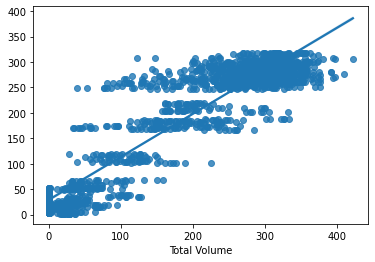

In [12]:
predictions = model.predict(X)
sns.regplot(Y,predictions)

In [13]:
import statsmodels.api as sm

(921, 29)
(615, 29)
(921,)
(615,)
21.0365838974584


/vol/bitbucket/jrb21/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Volume'>

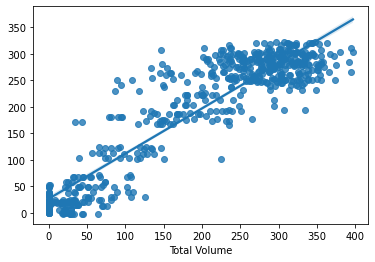

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

# print the intercept
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

predictions = model.predict(X_test)
predictions

sns.regplot(y_test,predictions)